In [57]:
import pandas as pd
import numpy as np
import statistics
data = pd.read_csv('heart.csv')
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import matthews_corrcoef
import seaborn as sns
import re
import category_encoders as ce
from sklearn import preprocessing

In [58]:
data['old'] = data['age'].apply(lambda x: 1 if x > 60 else 0)

In [59]:
def get_trestbps_mean(s):
    age = s['age']
    sex = s['sex']
    trestbps = pd.DataFrame({ 0 : [116, 120, 127, 137, 144, 159], 1 : [123, 126, 129, 135,142, 142]})
    if age <= 20:
        return trestbps[sex][0]
    elif age <= 30:
        return trestbps[sex][1]
    elif age <= 40:
        return trestbps[sex][2]
    elif age <= 50:
        return trestbps[sex][3]
    elif age <= 60:
        return trestbps[sex][4]
    else:
        return trestbps[sex][5]
data['trestbps_mean'] = data[['age', 'sex']].apply(get_trestbps_mean, axis = 1)

In [60]:
encoder = ce.OneHotEncoder(cols=['cp', 'ca', 'thal', 'restecg', 'slope']) # указываем столбец для кодирования
type_bin = encoder.fit_transform(data[['cp', 'ca', 'thal', 'restecg', 'slope']])
data = pd.concat([data, type_bin], axis=1)

In [61]:
data = data.drop(['cp', 'ca', 'thal', 'restecg', 'slope'], axis = 1)

In [65]:
r_scaler = preprocessing.RobustScaler()
for i in list(data.columns):
    if data[i].dtype == 'int64':
        data[i] = pd.DataFrame(r_scaler.fit_transform(data[[i]]))

In [68]:
data['chol'].describe()

count    303.000000
mean       0.098646
std        0.816232
min       -1.795276
25%       -0.456693
50%        0.000000
75%        0.543307
max        5.102362
Name: chol, dtype: float64

<Axes: >

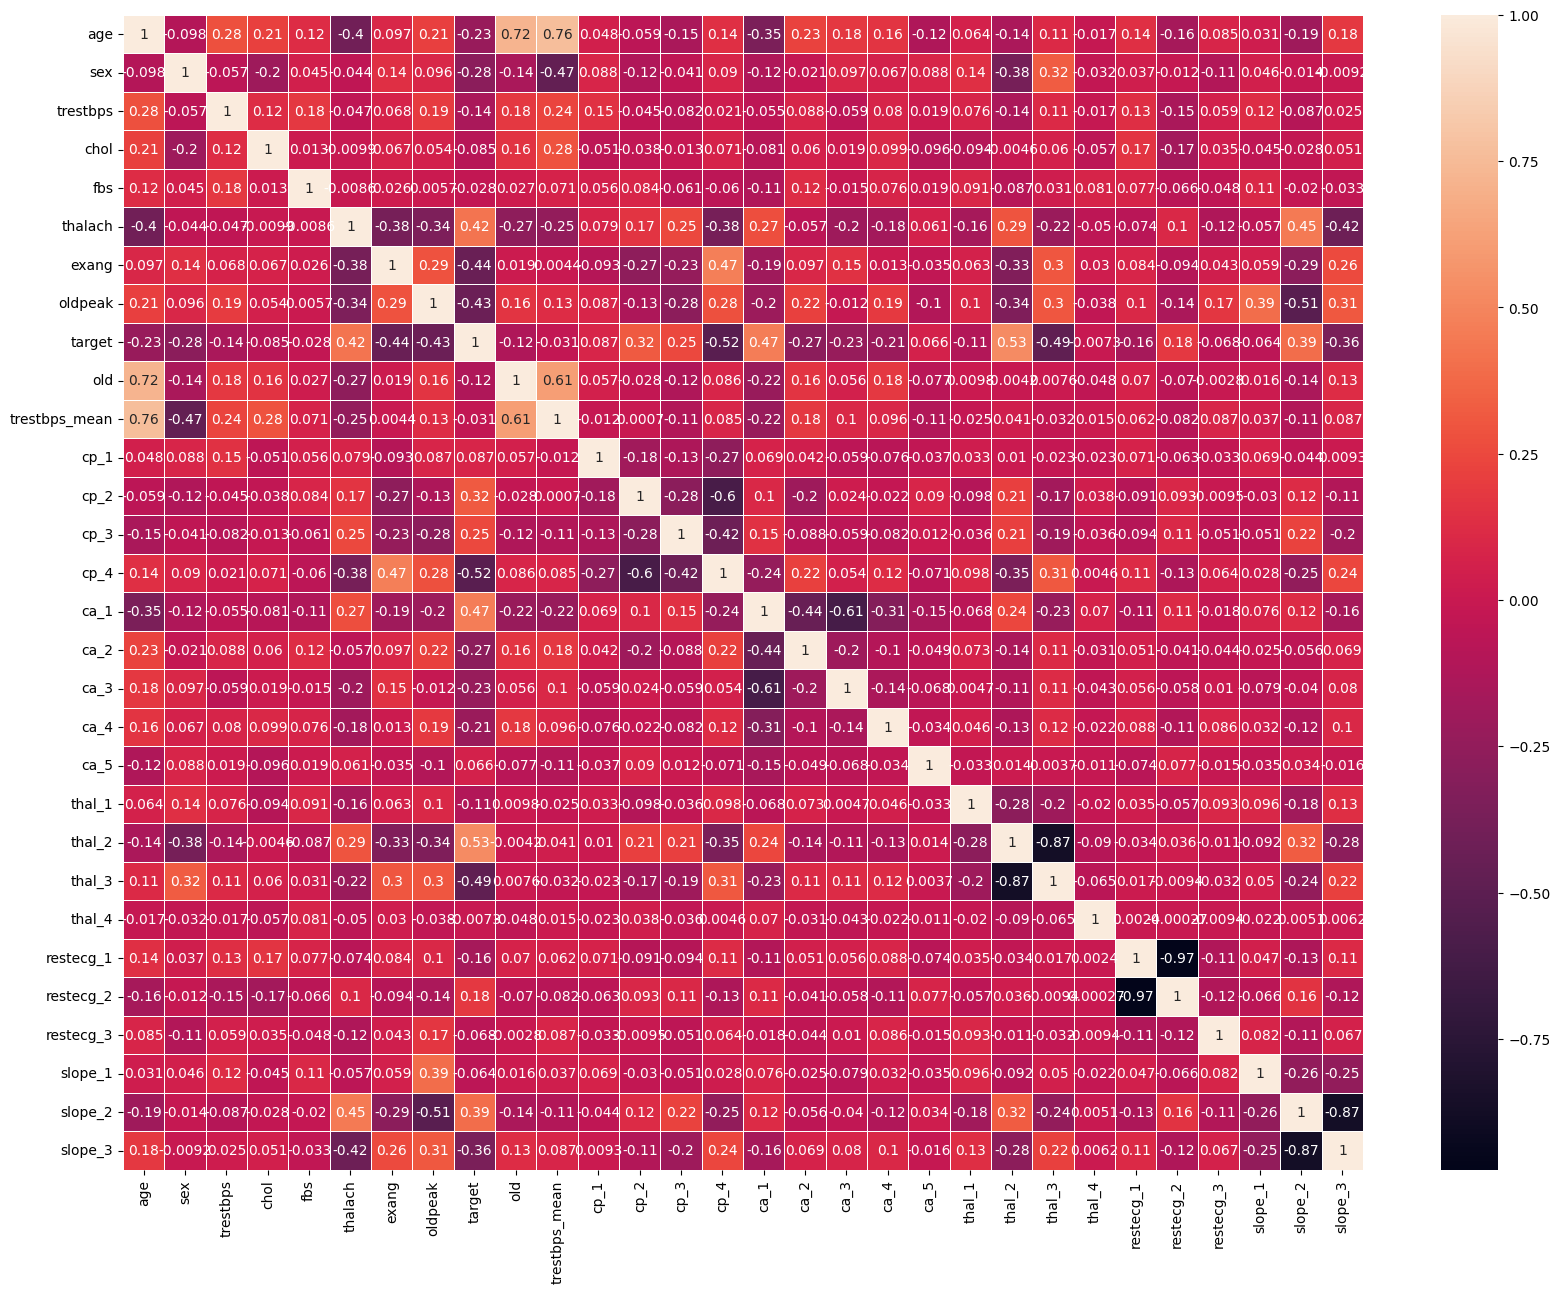

In [70]:
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(data.corr(numeric_only=True), annot=True, linewidths=.5, ax=ax)